In [1]:
### Mutation analysis ###
# all combined data sets

# observedMutations function calualte the basic mutational load. 
# Mutations can be calculated as counts or frequencies and divided into replacement (R) or 
# silent (S) mutations, and subset into FWR and CDR specific mutations.

# Import required packages
library(alakazam)
library(shazam)
library(dplyr)
library(ggplot2)

require(data.table)
db <- as.data.frame(fread("../../changeo_10x/r_vac_wt.tsv"))
subset_db <- subset(db, c_call %in% c("IGHA", "IGHG1", "IGHG2B", "IGHG2C", "IGHG3", "IGHM", "IGHD") & sample_id %in% "Control")

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
# Calculate R and S mutation counts
db_obs <- observedMutations(subset_db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=FALSE, 
                            nproc=1)
# Show new mutation count columns
db_obs %>% 
    select(sequence_id, starts_with("mu_count_")) %>%
    head(n=10)

,sequence_id,mu_count_seq_r,mu_count_seq_s
,<chr>,<dbl>,<dbl>
1,AGTCTTTGTAGGGACT-1_contig_2,0,0
2,ACTATCTTCTGGAGCC-1_contig_1,0,0
3,GGCTGGTAGTGTACGG-1_contig_1,0,0
4,TCACAAGCAGTTTACG-1_contig_2,0,0
5,TCGGGACAGATCCCGC-1_contig_2,0,0
6,GTGTTAGCATCACGAT-1_contig_1,0,0
7,GCAGTTACATCGATTG-1_contig_2,0,0
8,GCAGCCAGTACCGCTG-1_contig_1,0,0
9,CGTAGCGGTTAAGATG-1_contig_1,0,0


In [3]:
# Calculate R and S mutation frequencies
db_obs <- observedMutations(db_obs, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id,mu_freq_seq_r,mu_freq_seq_s
,<chr>,<dbl>,<dbl>
1,AGTCTTTGTAGGGACT-1_contig_2,0,0
2,ACTATCTTCTGGAGCC-1_contig_1,0,0
3,GGCTGGTAGTGTACGG-1_contig_1,0,0
4,TCACAAGCAGTTTACG-1_contig_2,0,0


In [4]:
# Calculate combined R and S mutation frequencies
db_obs <- observedMutations(subset_db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            combine=TRUE,
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id
,<chr>
1,AGTCTTTGTAGGGACT-1_contig_2
2,ACTATCTTCTGGAGCC-1_contig_1
3,GGCTGGTAGTGTACGG-1_contig_1
4,TCACAAGCAGTTTACG-1_contig_2


Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


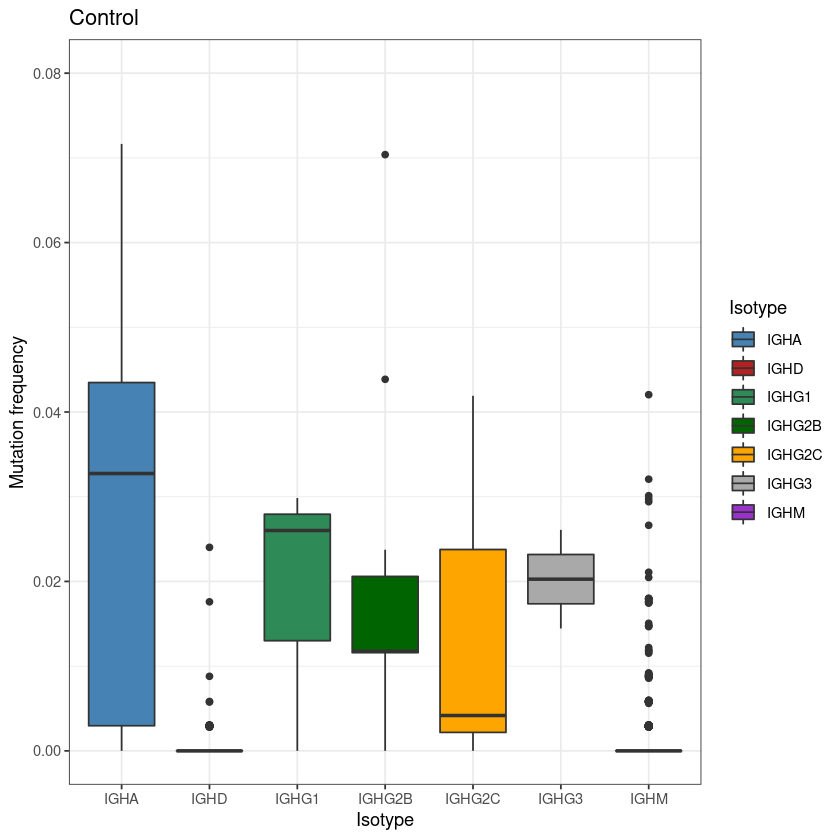

In [6]:
isotype_colors <- c("IGHM"="darkorchid", "IGHD"="firebrick", "IGHA"="steelblue",
                    "IGHG1"="seagreen", "IGHG2B"="darkgreen", "IGHG2C"="orange",
                   "IGHG3"="darkgrey")

g1 <- ggplot(db_obs, aes(x=c_call, y=mu_freq, fill=c_call)) +
    theme_bw() + ggtitle("Control") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=isotype_colors) +
    geom_boxplot() + ylim(0, 0.08)
plot(g1)